In [1]:
import spacy

In [2]:
nlp = spacy.load('en_core_web_sm')

In [3]:
from spacy.tokens import span

In [4]:
import numpy as np
import pandas as pd

In [5]:
df = pd.read_csv('cyberbullying_tweets.csv')

In [6]:
import nltk

In [7]:
df['tweet_text'] = df['tweet_text'].astype(str)

In [8]:
import re
import numpy as np
df.tweet_text=df.tweet_text.str.replace("@\w*", " ")

C:\Users\rafsa\AppData\Local\Temp\ipykernel_10560\261453544.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df.tweet_text=df.tweet_text.str.replace("@\w*", " ")


In [9]:
df.tweet_text=df.tweet_text.str.replace("[^a-zA-Z]", " ")

C:\Users\rafsa\AppData\Local\Temp\ipykernel_10560\2636496267.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df.tweet_text=df.tweet_text.str.replace("[^a-zA-Z]", " ")


In [10]:
df.head()

,tweet_text,cyberbullying_type
0,In other words katandandre your food was cra...,not_cyberbullying
1,Why is aussietv so white MKR theblock ImA...,not_cyberbullying
2,a classy whore Or more red velvet cupcakes,not_cyberbullying
3,meh P thanks for the heads up but not to...,not_cyberbullying
4,This is an ISIS account pretending to be a K...,not_cyberbullying


In [11]:
nltk.word_tokenize(df['tweet_text'][0])

['In',
 'other',
 'words',
 'katandandre',
 'your',
 'food',
 'was',
 'crapilicious',
 'mkr']

In [12]:
from nltk.corpus import stopwords

In [13]:
stop_word = set(stopwords.words('English'))

In [14]:
df.apply(lambda x: x.astype(str).str.lower())

,tweet_text,cyberbullying_type
0,in other words katandandre your food was cra...,not_cyberbullying
1,why is aussietv so white mkr theblock ima...,not_cyberbullying
2,a classy whore or more red velvet cupcakes,not_cyberbullying
3,meh p thanks for the heads up but not to...,not_cyberbullying
4,this is an isis account pretending to be a k...,not_cyberbullying
...,...,...
47687,black ppl aren t expected to do anything depe...,ethnicity
47688,turner did not withhold his disappointment tu...,ethnicity
47689,i swear to god this dumb nigger bitch i have...,ethnicity
47690,yea fuck you rt if youre a nigger fucking u...,ethnicity


In [15]:
df['tweet_text'].str.split()

0        [In, other, words, katandandre, your, food, wa...
1        [Why, is, aussietv, so, white, MKR, theblock, ...
2        [a, classy, whore, Or, more, red, velvet, cupc...
3        [meh, P, thanks, for, the, heads, up, but, not...
4        [This, is, an, ISIS, account, pretending, to, ...
                               ...                        
47687    [Black, ppl, aren, t, expected, to, do, anythi...
47688    [Turner, did, not, withhold, his, disappointme...
47689    [I, swear, to, God, This, dumb, nigger, bitch,...
47690    [Yea, fuck, you, RT, IF, YOURE, A, NIGGER, FUC...
47691    [Bro, U, gotta, chill, RT, Dog, FUCK, KP, that...
Name: tweet_text, Length: 47692, dtype: object

In [16]:
df['tweettext'] = df['tweet_text'].apply(lambda x: ' '.join([item for item in x.split() if item not in stop_word]))

In [17]:
df.dropna()

,tweet_text,cyberbullying_type,tweettext
0,In other words katandandre your food was cra...,not_cyberbullying,In words katandandre food crapilicious mkr
1,Why is aussietv so white MKR theblock ImA...,not_cyberbullying,Why aussietv white MKR theblock ImACelebrityAU...
2,a classy whore Or more red velvet cupcakes,not_cyberbullying,classy whore Or red velvet cupcakes
3,meh P thanks for the heads up but not to...,not_cyberbullying,meh P thanks heads concerned another angry dud...
4,This is an ISIS account pretending to be a K...,not_cyberbullying,This ISIS account pretending Kurdish account L...
...,...,...,...
47687,Black ppl aren t expected to do anything depe...,ethnicity,Black ppl expected anything depended anything ...
47688,Turner did not withhold his disappointment Tu...,ethnicity,Turner withhold disappointment Turner called c...
47689,I swear to God This dumb nigger bitch I have...,ethnicity,I swear God This dumb nigger bitch I got bleac...
47690,Yea fuck you RT IF YOURE A NIGGER FUCKING U...,ethnicity,Yea fuck RT IF YOURE A NIGGER FUCKING UNFOLLOW...


In [18]:
df.head()

,tweet_text,cyberbullying_type,tweettext
0,In other words katandandre your food was cra...,not_cyberbullying,In words katandandre food crapilicious mkr
1,Why is aussietv so white MKR theblock ImA...,not_cyberbullying,Why aussietv white MKR theblock ImACelebrityAU...
2,a classy whore Or more red velvet cupcakes,not_cyberbullying,classy whore Or red velvet cupcakes
3,meh P thanks for the heads up but not to...,not_cyberbullying,meh P thanks heads concerned another angry dud...
4,This is an ISIS account pretending to be a K...,not_cyberbullying,This ISIS account pretending Kurdish account L...


In [19]:
del df['tweet_text']

In [20]:
del df ['cyberbullying_type']

In [21]:
df.head()

,tweettext
0,In words katandandre food crapilicious mkr
1,Why aussietv white MKR theblock ImACelebrityAU...
2,classy whore Or red velvet cupcakes
3,meh P thanks heads concerned another angry dud...
4,This ISIS account pretending Kurdish account L...


In [22]:
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import string
from nltk.tokenize import TweetTokenizer
import re
import nltk
from nltk.stem import WordNetLemmatizer
def decontract(text):
    text = re.sub(r"won\'t", "will not", text)
    text = re.sub(r"can\'t", "can not", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    return text
lemmatizer = WordNetLemmatizer()
def process_text(text):

    stemmer = PorterStemmer()
    stopwords_english = stopwords.words('english')
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text)
    # remove hashtags
    # only removing the hash # sign from the word
    text = re.sub(r'#', '', text)
    text = str(re.sub("\S*\d\S*", "", text).strip()) 
    text=decontract(text)
    # tokenize texts
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                              reduce_len=True)
    tokens = tokenizer.tokenize(text)
    texts_clean = []
    for word in tokens:
        if (word not in stopwords_english and  # remove stopwords
                word not in string.punctuation+'...'):  # remove punctuation
             
            stem_word = lemmatizer.lemmatize(word,"v")  # Lemmatizing word
            texts_clean.append(stem_word)

    return " ".join(texts_clean)

df['tweettext']=df['tweettext'].apply(lambda x: process_text(str(x)))
df.head()


,tweettext
0,word katandandre food crapilicious mkr
1,aussietv white mkr theblock imacelebrityau tod...
2,classy whore red velvet cupcakes
3,meh p thank head concern another angry dude tw...
4,isis account pretend kurdish account like isla...


In [23]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [24]:
df['scores']= df['tweettext'].apply(lambda tweettext: sid.polarity_scores(tweettext))

In [25]:
df.head()

,tweettext,scores
0,word katandandre food crapilicious mkr,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,aussietv white mkr theblock imacelebrityau tod...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,classy whore red velvet cupcakes,"{'neg': 0.422, 'neu': 0.294, 'pos': 0.284, 'co..."
3,meh p thank head concern another angry dude tw...,"{'neg': 0.38, 'neu': 0.413, 'pos': 0.207, 'com..."
4,isis account pretend kurdish account like isla...,"{'neg': 0.141, 'neu': 0.606, 'pos': 0.253, 'co..."


In [26]:
df['compound'] = df['scores'].apply(lambda score_dict: score_dict['compound'])
df['cyberbullying_possibilities'] = df['compound'].apply(lambda c: 'pos' if c>=0 else 'neg')
df.head()

,tweettext,scores,compound,cyberbullying_possibilities
0,word katandandre food crapilicious mkr,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos
1,aussietv white mkr theblock imacelebrityau tod...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos
2,classy whore red velvet cupcakes,"{'neg': 0.422, 'neu': 0.294, 'pos': 0.284, 'co...",-0.3400,neg
3,meh p thank head concern another angry dude tw...,"{'neg': 0.38, 'neu': 0.413, 'pos': 0.207, 'com...",-0.2732,neg
4,isis account pretend kurdish account like isla...,"{'neg': 0.141, 'neu': 0.606, 'pos': 0.253, 'co...",0.2732,pos


In [27]:
from sklearn.model_selection import train_test_split 
x = df['tweettext']
y=df['cyberbullying_possibilities']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=42)

In [28]:
import sklearn
import numpy as np
from __future__ import print_function
import sklearn
import sklearn.ensemble
import sklearn.metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
x_train_tfidf = vectorizer.fit_transform(x_train)
x_test_tfidf= vectorizer.transform(x_test)

In [30]:
rf1 = sklearn.ensemble.RandomForestClassifier(n_estimators=500)

In [31]:
rf1.fit(x_train_tfidf, y_train)

RandomForestClassifier(n_estimators=500)

In [32]:
predictions = rf1.predict(x_test_tfidf)

In [33]:
from sklearn import metrics 
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
print(metrics.confusion_matrix(y_test, predictions))

[[8302  546]
 [1337 4123]]


In [34]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         neg       0.86      0.94      0.90      8848
         pos       0.88      0.76      0.81      5460

    accuracy                           0.87     14308
   macro avg       0.87      0.85      0.86     14308
weighted avg       0.87      0.87      0.87     14308



In [35]:
rf2 = LogisticRegression()

In [36]:
rf2.fit(x_train_tfidf, y_train)

C:\Users\rafsa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [37]:
predictions = rf2.predict(x_test_tfidf)

In [38]:
print(metrics.confusion_matrix(y_test, predictions))

[[8221  627]
 [ 780 4680]]


In [39]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         neg       0.91      0.93      0.92      8848
         pos       0.88      0.86      0.87      5460

    accuracy                           0.90     14308
   macro avg       0.90      0.89      0.90     14308
weighted avg       0.90      0.90      0.90     14308



In [40]:
rf3= GradientBoostingClassifier(random_state=1, n_estimators=500)

In [41]:
rf3.fit(x_train_tfidf, y_train)

GradientBoostingClassifier(n_estimators=500, random_state=1)

In [42]:
predictions = rf3.predict(x_test_tfidf)

In [43]:
print(metrics.confusion_matrix(y_test, predictions))

[[7809 1039]
 [ 896 4564]]


In [44]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         neg       0.90      0.88      0.89      8848
         pos       0.81      0.84      0.83      5460

    accuracy                           0.86     14308
   macro avg       0.86      0.86      0.86     14308
weighted avg       0.87      0.86      0.87     14308



In [45]:
rf4 = ExtraTreesClassifier(n_estimators=500, random_state=1)

In [46]:
rf4.fit(x_train_tfidf, y_train)

ExtraTreesClassifier(n_estimators=500, random_state=1)

In [47]:
predictions = rf4.predict(x_test_tfidf)
from sklearn import metrics 
print(metrics.confusion_matrix(y_test, predictions))

[[8472  376]
 [1428 4032]]


In [48]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         neg       0.86      0.96      0.90      8848
         pos       0.91      0.74      0.82      5460

    accuracy                           0.87     14308
   macro avg       0.89      0.85      0.86     14308
weighted avg       0.88      0.87      0.87     14308



In [49]:
from sklearn.svm import SVC
from sklearn import svm

In [50]:
rf5 = svm.SVC(kernel='linear', C=1, probability=True)

In [51]:
rf5.fit(x_train_tfidf, y_train)

SVC(C=1, kernel='linear', probability=True)

In [52]:
predictions = rf5.predict(x_test_tfidf)
from sklearn import metrics 
print(metrics.confusion_matrix(y_test, predictions))

[[8253  595]
 [ 584 4876]]


In [53]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         neg       0.93      0.93      0.93      8848
         pos       0.89      0.89      0.89      5460

    accuracy                           0.92     14308
   macro avg       0.91      0.91      0.91     14308
weighted avg       0.92      0.92      0.92     14308



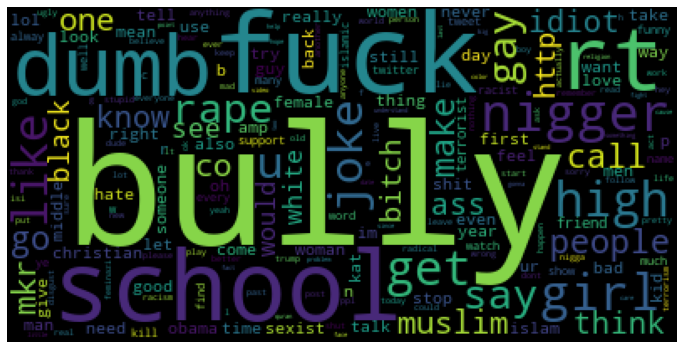

In [54]:
from nltk.corpus import stopwords
from wordcloud import WordCloud
import re

def clean_text(s):
    s = re.sub(r'http\S+', '', s)
    s = re.sub('(RT|via)((?:\\b\\W*@\\w+)+)', ' ', s)
    s = re.sub(r'@\S+', '', s)
    s = re.sub('&amp', ' ', s)
    return s
df['clean_tweet'] = df['tweettext'].apply(clean_text)

text = df['clean_tweet'].to_string().lower()    
wordcloud = WordCloud(
    collocations=False,
    relative_scaling=0.5,
    stopwords=set(stopwords.words('english'))).generate(text)

plt.figure(figsize=(12,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

How many most common words to print: 30
The 30 most common words are as follows

bully :  10882
school :  9173
fuck :  6766
like :  5960
joke :  5608
get :  5131
high :  5064
dumb :  4977
people :  4671
nigger :  4356
rape :  4328
say :  4149
gay :  4056
u :  4051
make :  3857
call :  3805
go :  3276
co :  3262
one :  3126
http :  3093
amp :  2958
ass :  2817
black :  2794
think :  2600
know :  2564
girl :  2472
mkr :  2470
girls :  2469
bitch :  2443
muslims :  2358


<AxesSubplot:xlabel='Word'>

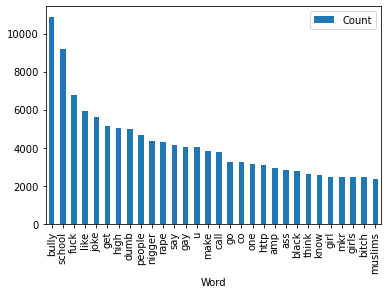

In [55]:
import collections
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
file = open('cyberbullyingtweets_1.csv', encoding="utf8")
a= file.read()
wordcount = {}
for word in a.lower().split():
        word = word.replace(".","")
        word = word.replace(",","")
        word = word.replace(":","")
        word = word.replace("\"","")
        word = word.replace("!","")
        word = word.replace("â€œ","")
        word = word.replace("â€˜","")
        word = word.replace("*","")
        if word not in wordcount:
                wordcount[word] = 1
        else:
                wordcount[word] += 1
n_print = int(input("How many most common words to print: "))
print("The {} most common words are as follows\n".format(n_print))
word_counter = collections.Counter(wordcount)
for word, count in word_counter.most_common(n_print):
    print(word, ": ", count)
file.close()
lst = word_counter.most_common(n_print)
df = pd.DataFrame(lst, columns = ['Word', 'Count'])
df.plot.bar(x='Word',y='Count')

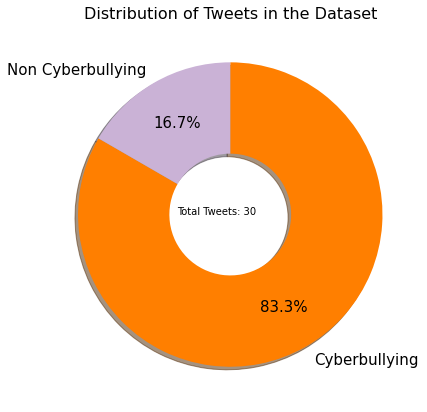

In [56]:
import seaborn as sns
df1 = pd.read_csv('newcleaneddata.csv')
plt.figure(figsize = (7,7))
sorted_counts = df1['cyberbullyingtype'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False, wedgeprops = {'width' : 0.6},
       autopct='%1.1f%%', pctdistance = 0.7, textprops = {'color': 'black', 'fontsize' : 15}, shadow = True,
        colors = sns.color_palette("Paired")[7:])
plt.text(x = -0.35, y = 0, s = 'Total Tweets: {}'.format(df.shape[0]))
plt.title('Distribution of Tweets in the Dataset', fontsize = 16);